# Python for (open) Neuroscience

_Lecture 1.5_ - More plotting

Luigi Petrucco

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2024/blob/main/lectures/Lecture1.5_More-plotting.ipynb)

## Object-oriented plotting using `matplotlib`

Recap: the standard plotting library in Python is `matplotlib`.

In [26]:
import matplotlib.pyplot as plt

To open a new figure, we call `plt.figure()` (if we don't, matplotlib will plot on the last figure we opened).

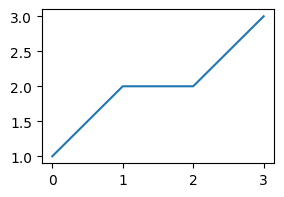

In [71]:
plt.figure(figsize=(3,2))  # with the figsize argument we can control the dimension of the plot
plt.plot([1, 2, 2, 3])  # plot a line


In a simple plot we can control attributes of the plot with some functions such as `plt.xlabel()` or `plt.xlim()`:

(0.0, 500.0)

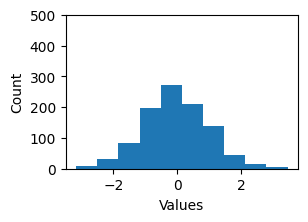

In [33]:
plt.figure(figsize=(3,2))
plt.hist(np.random.randn(1000))
plt.xlabel("Values")
plt.ylabel("Count")
plt.ylim(0, 500)

## Object oriented interface

`matplotlib` has two interfaces: a simple one, and an object oriented one.

To make more complex plots, we should use the object oriented interface: it's more flexible and expressive.

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

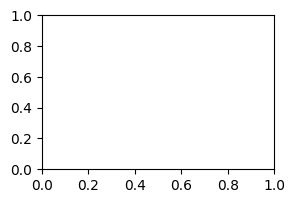

In [34]:
fig, ax = plt.subplots(figsize=(3,2)) # this will create a figure and an axis object

In [72]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Money'), Text(0.5, 1.0, 'My plot')]

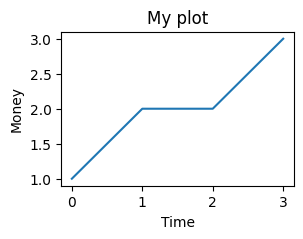

In [74]:
fig, ax = plt.subplots(figsize=(3,2)) # this will create a figure and an axis object
# We can now call methods of the axis object:
ax.plot([1, 2, 2, 3])

# We can modify the aspect of the axis using its methods:
ax.set(xlabel="Time", ylabel="Money", title="My plot")

My recommandation is to get used to the object oriented interface!

Also, I would generally stick to the `matplotlib` functions to generate panels and not mix code with the pandas plotting functions.

## Matplotlib subplots

Using `plt.subplots()` we can create a figure with multiple panels:

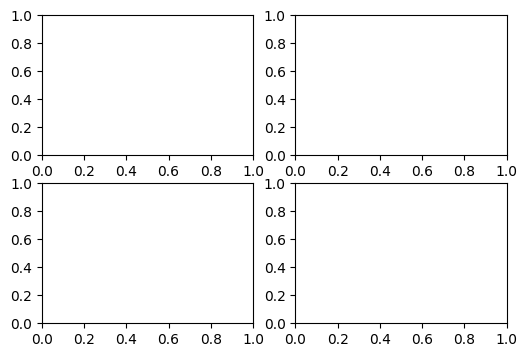

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))

Those axes will be a 2x2 array `numpy` array of axis objects!

In [76]:
type(axes)

numpy.ndarray

In [77]:
axes.shape

(2, 2)

In [78]:
type(axes[0, 0])

matplotlib.axes._axes.Axes

We can plot on each of the axes indexing them the numpy way:

In [43]:
axes[0, 0]  # access one subplot from the grid. From here we can plot using plotting methods

<Axes: >

So we first index the correct axis, and then we use its plotting method:

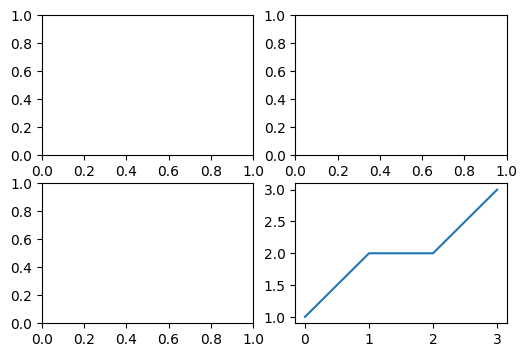

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))

axes[1, 1].plot([1, 2, 2, 3])

It is easy to iterate over multiple axes:

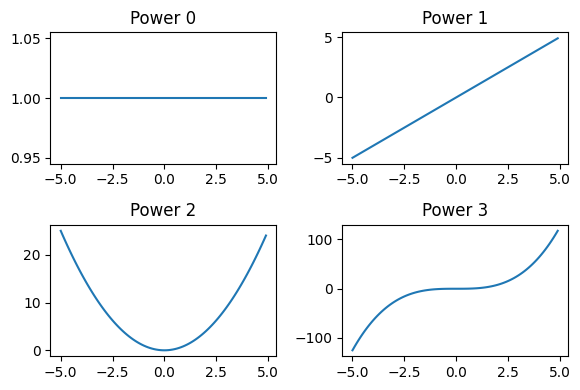

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
x = np.arange(-5, 5, 0.1)

# Double loop over rows and columns
for col_idx  in range(2):
    for row_idx in range(2):
        current_axis = axes[row_idx, col_idx]  # current_axis = axes.flat[i]  # Select one axis
        i = col_idx + row_idx*2
        current_axis.plot(x, x**i)  # Plot on it
        current_axis.set(title=f"Power {i}")  # Set title
        
## cleaner alternative to go through all plots in a single loop:
for i in range(4):
    current_axis = axes.flat[i]
    ...
    

plt.tight_layout()  # separate plots better

Practicals 1.4.2